In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WorldHappinessreport.csv")
df.head()
df.columns = df.columns.str.strip()
df.head()



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


problem-1

In [ ]:
#Dataset Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


,count
Happiness Category,
Medium,70
High,56
Low,17


In [ ]:
#Basic statistics
score_col = "score"   # If your score column has different name then change here
df[score_col].mean(), df[score_col].median(), df[score_col].std()


(np.float64(5.52758041958042), 5.785, 1.1707165099442995)

In [ ]:
#Highest and Lowest Happiness
highest = df.loc[df[score_col].idxmax()]
lowest  = df.loc[df[score_col].idxmin()]
highest, lowest

(Country name                    Finland
 score                             7.741
 Log GDP per capita                1.844
 Social support                    1.572
 Healthy life expectancy           0.695
 Freedom to make life choices      0.859
 Generosity                        0.142
 Perceptions of corruption         0.546
 Dystopia + residual               2.082
 Happiness Category                 High
 country_clean                   finland
 Name: 0, dtype: object,
 Country name                    Afghanistan
 score                                 1.721
 Log GDP per capita                    0.628
 Social support                          0.0
 Healthy life expectancy               0.242
 Freedom to make life choices            0.0
 Generosity                            0.091
 Perceptions of corruption             0.088
 Dystopia + residual                   0.672
 Happiness Category                      Low
 country_clean                   afghanistan
 Name: 142, dtype: object)

In [ ]:
#Missing values
df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3
Happiness Category,0


In [ ]:
#Countries with Score
filtered = df[df[score_col] > 7.5]
filtered


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,country_clean
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High,finland
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High,denmark
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High,iceland


In [ ]:
#Happiness category
def category(s):
    if s < 4:
        return "Low"
    elif s <= 6:
        return "Medium"
    else:
        return "High"
df["Happiness Category"] = df[score_col].apply(category)
df["Happiness Category"].value_counts()

,count
Happiness Category,
Medium,70
High,56
Low,17


2.Data Visualization


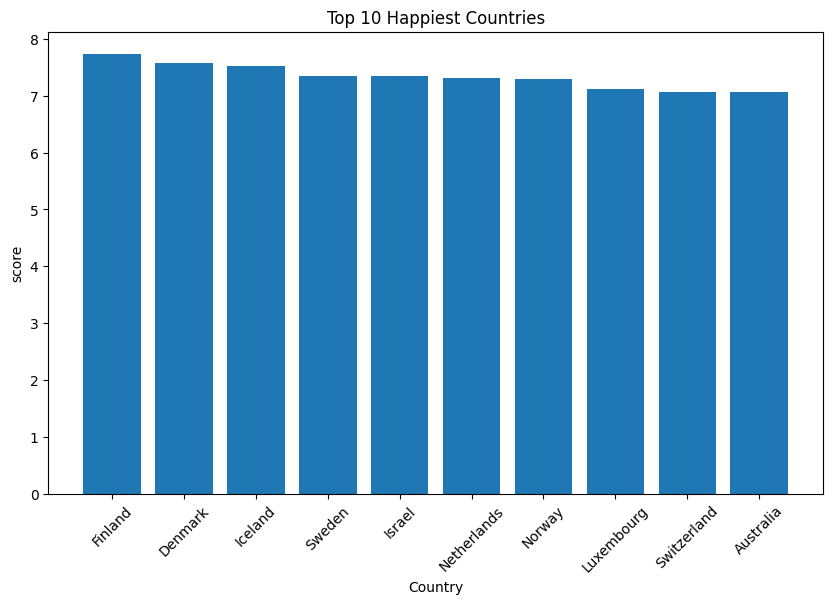

In [ ]:
from os import name
#Bar plot
top10 = df.sort_values(by=score_col, ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10['Country name'], top10[score_col])
plt.xticks(rotation=45)
plt.title("Top 10 Happiest Countries")
plt.xlabel("Country")
plt.ylabel("score")
plt.show()



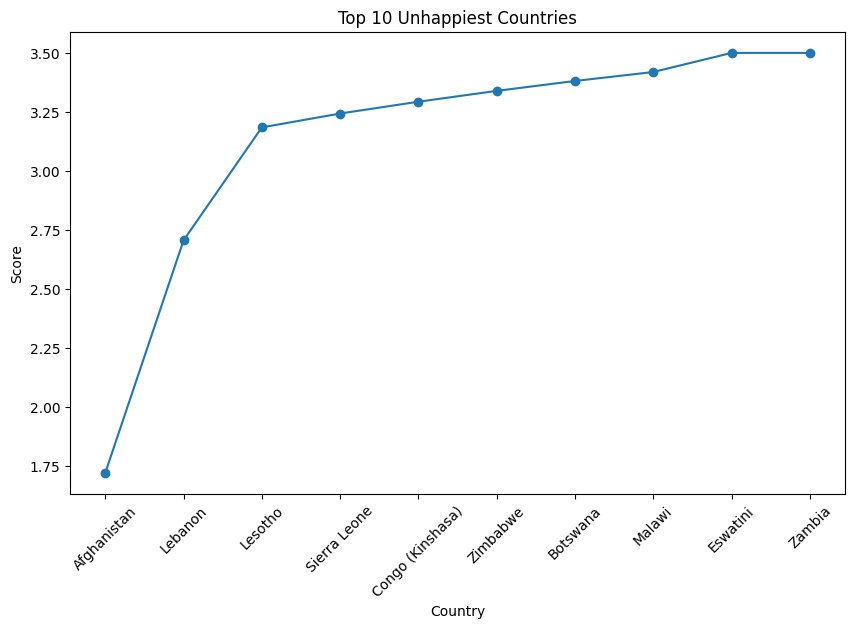

In [ ]:
#Line Plot
bottom10 = df.sort_values(by=score_col, ascending=True).head(10)

plt.figure(figsize=(10,6))
plt.plot(bottom10['Country name'], bottom10[score_col], marker='o')
plt.xticks(rotation=45)
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Country")
plt.ylabel("Score")
plt.show()


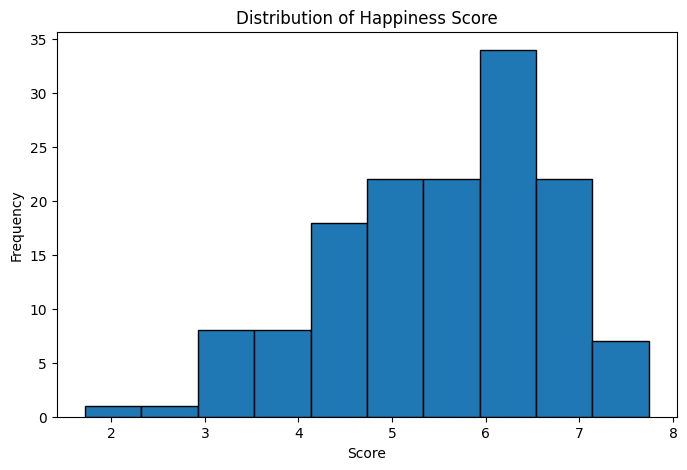

In [ ]:
#Histogram
plt.figure(figsize=(8,5))
plt.hist(df[score_col], bins=10, edgecolor='black')
plt.title("Distribution of Happiness Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


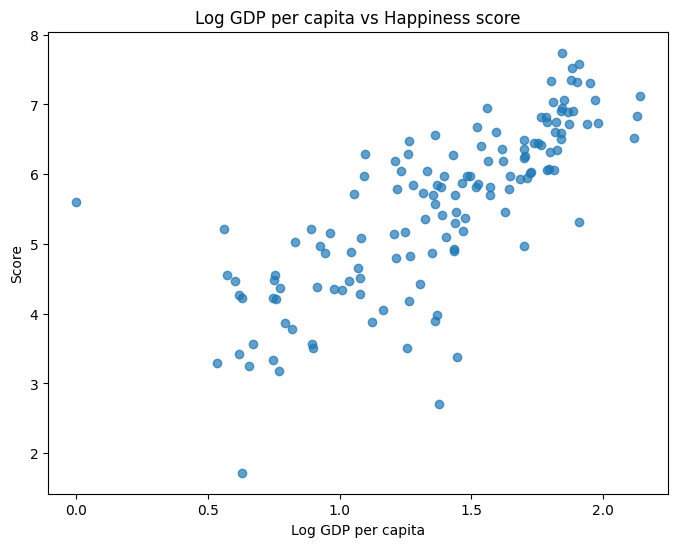

In [ ]:
#Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df[gdp_col], df[score_col], alpha=0.7)
plt.title("Log GDP per capita vs Happiness score")
plt.xlabel("Log GDP per capita")
plt.ylabel("Score")
plt.show()


problem2

/tmp/ipython-input-1874271250.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df["Composite"] = (south_df[gdp_col] + south_df[social_col] + south_df[health_col]) / 3


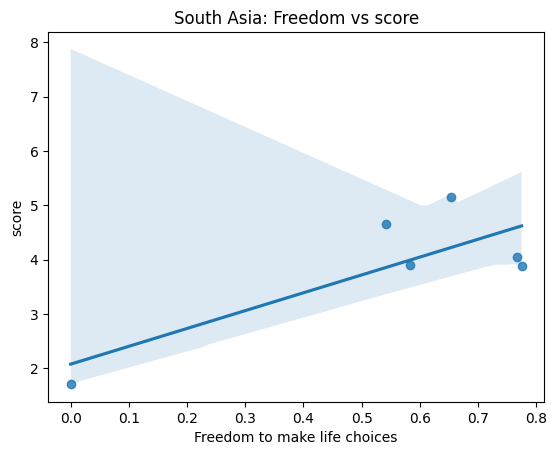

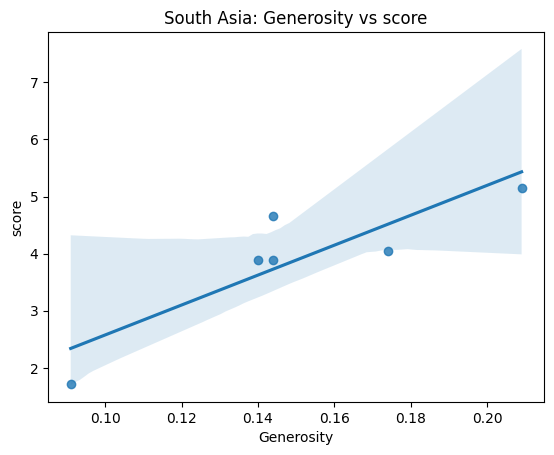

/tmp/ipython-input-1874271250.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df["Gap"] = south_df[gdp_col] - south_df[score_col]


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,country_clean,Composite,Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,afghanistan,0.290000,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,sri lanka,1.042000,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,bangladesh,0.628000,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,india,0.745333,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,pakistan,0.663333,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,nepal,0.799333,-4.193


In [ ]:
#Filter South Asian countries
south_asia = ["Nepal","India","Pakistan","Bangladesh","Sri Lanka","Afghanistan","Bhutan","Maldives"]

df['country_clean'] = df['Country name'].str.lower().str.strip()
south_list = [c.lower() for c in south_asia]

south_df = df[df['country_clean'].isin(south_list)]
south_df



In [ ]:
#Composite Score
gdp_col = "Log GDP per capita"
social_col = "Social support"
health_col = "Healthy life expectancy"

south_df["Composite"] = (south_df[gdp_col] + south_df[social_col] + south_df[health_col]) / 3
south_df


/tmp/ipython-input-2024254258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df["Composite"] = (south_df[gdp_col] + south_df[social_col] + south_df[health_col]) / 3


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,country_clean,Composite,Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,nepal,0.799333,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,pakistan,0.663333,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,india,0.745333,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,sri lanka,1.042000,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,bangladesh,0.628000,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,afghanistan,0.290000,-1.093


In [ ]:
#Outliers
Q1 = south_df[score_col].quantile(0.25)
Q3 = south_df[score_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

south_outliers = south_df[(south_df[score_col] < lower) | (south_df[score_col] > upper)]
south_outliers


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,country_clean,Composite,Gap
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,afghanistan,0.29,-1.093


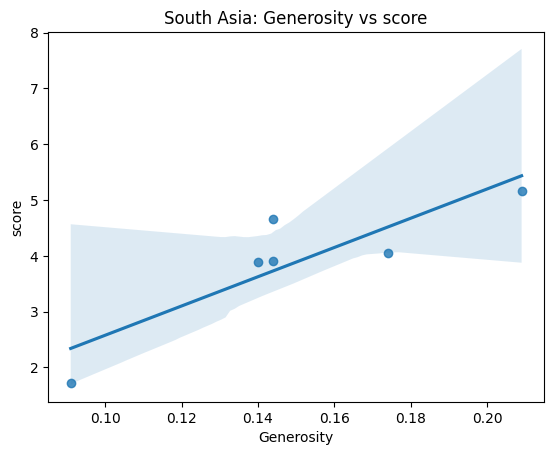

In [ ]:
#Score vs Genorsity
generosity_col = "Generosity"

sns.regplot(x=generosity_col, y=score_col, data=south_df)
plt.title("South Asia: Generosity vs score")
plt.show()


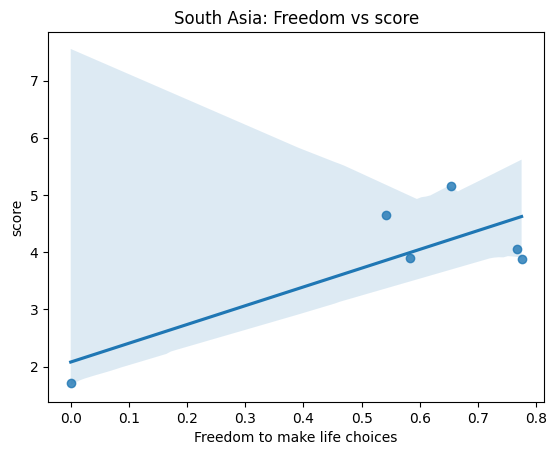

In [ ]:
#Score vs Freedom
freedom_col = "Freedom to make life choices"

sns.regplot(x=freedom_col, y=score_col, data=south_df)
plt.title("South Asia: Freedom vs score")
plt.show()

In [ ]:
#GDP-Score Gap
south_df["Gap"] = south_df[gdp_col] - south_df[score_col]
south_df.sort_values(by="Gap", ascending=False)


/tmp/ipython-input-3897124135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df["Gap"] = south_df[gdp_col] - south_df[score_col]


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,country_clean,Composite,Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,afghanistan,0.290000,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,sri lanka,1.042000,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,bangladesh,0.628000,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,india,0.745333,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,pakistan,0.663333,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,nepal,0.799333,-4.193


problem3

In [ ]:
#Middle East Filtering
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon",
               "Oman","Qatar","Saudi Arabia","Syria","UAE","Yemen"]

middle_list = [c.lower() for c in middle_east]
middle_df = df[df['Country name'].isin(middle_list)]
middle_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,country_clean


In [ ]:
#Mean and std comparison
south_mean = south_df[score_col].mean()
middle_mean = middle_df[score_col].mean()

south_std = south_df[score_col].std()
middle_std = middle_df[score_col].std()

south_mean, middle_mean, south_std, middle_std

(np.float64(3.895666666666667), nan, 1.1770690152521504, nan)

In [ ]:
#Top3 and Bottom3
south_top3 = south_df.sort_values(by=score_col, ascending=False).head(3)
south_bottom3 = south_df.sort_values(by=score_col, ascending=True).head(3)

middle_top3 = middle_df.sort_values(by=score_col, ascending=False).head(3)
middle_bottom3 = middle_df.sort_values(by=score_col, ascending=True).head(3)

south_top3, south_bottom3, middle_top3, middle_bottom3

(    Country name  score  Log GDP per capita  Social support  \
 92         Nepal  5.158               0.965           0.990   
 107     Pakistan  4.657               1.069           0.600   
 125        India  4.054               1.166           0.653   
 
      Healthy life expectancy  Freedom to make life choices  Generosity  \
 92                     0.443                         0.653       0.209   
 107                    0.321                         0.542       0.144   
 125                    0.417                         0.767       0.174   
 
      Perceptions of corruption  Dystopia + residual Happiness Category  \
 92                       0.115                1.783             Medium   
 107                      0.074                1.907             Medium   
 125                      0.122                0.756             Medium   
 
     country_clean  Composite    Gap  
 92          nepal   0.799333 -4.193  
 107      pakistan   0.663333 -3.588  
 125         india   

In [ ]:

#Compare Metrics
south_metrics = south_df[[gdp_col,social_col,health_col]].mean()
middle_metrics = middle_df[[gdp_col,social_col,health_col]].mean()

south_metrics, middle_metrics

(Log GDP per capita         1.051833
 Social support             0.611833
 Healthy life expectancy    0.420333
 dtype: float64,
 Log GDP per capita        NaN
 Social support            NaN
 Healthy life expectancy   NaN
 dtype: float64)

In [ ]:
#Score Range & cv
south_range = south_df[score_col].max() - south_df[score_col].min()
middle_range = middle_df[score_col].max() - middle_df[score_col].min()

south_cv = south_df[score_col].std()/south_df[score_col].mean()
middle_cv = middle_df[score_col].std()/middle_df[score_col].mean()

south_range, middle_range, south_cv, middle_cv

(3.4370000000000003, nan, np.float64(0.3021482883337427), nan)

/tmp/ipython-input-2627768905.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([south_df[score_col], middle_df[score_col]], labels=["South Asia","Middle East"])


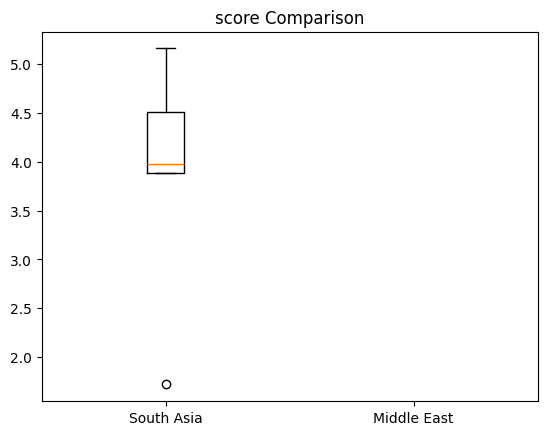

In [ ]:
#Boxplot Comparison
plt.boxplot([south_df[score_col], middle_df[score_col]], labels=["South Asia","Middle East"])
plt.title("score Comparison")
plt.show()
